In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [7]:
train.shape

(31647, 18)

In [8]:
test.shape

(13564, 17)

In [9]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [10]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


Subscribed (target): has the client subscribed a term deposit? (YES/NO):subscribed is the variable that is to be to be predicted

In [11]:
#missing value
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Analysis:

In [13]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

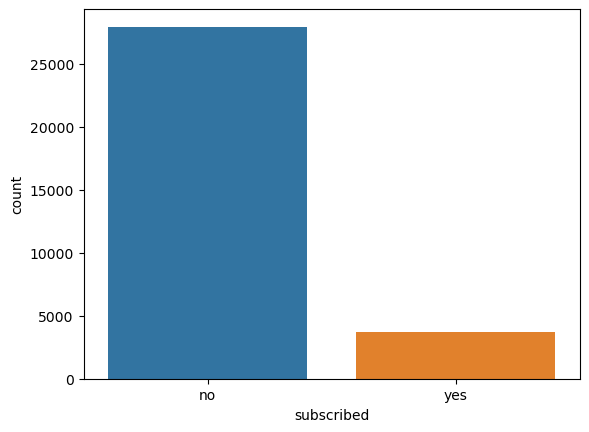

In [14]:
sns.countplot(data=train, x='subscribed')

 number of people saying no to term deposit is more than the people saying yes.

# Visualize catogorical value

In [15]:
#Frequency table
train['job'].value_counts()


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

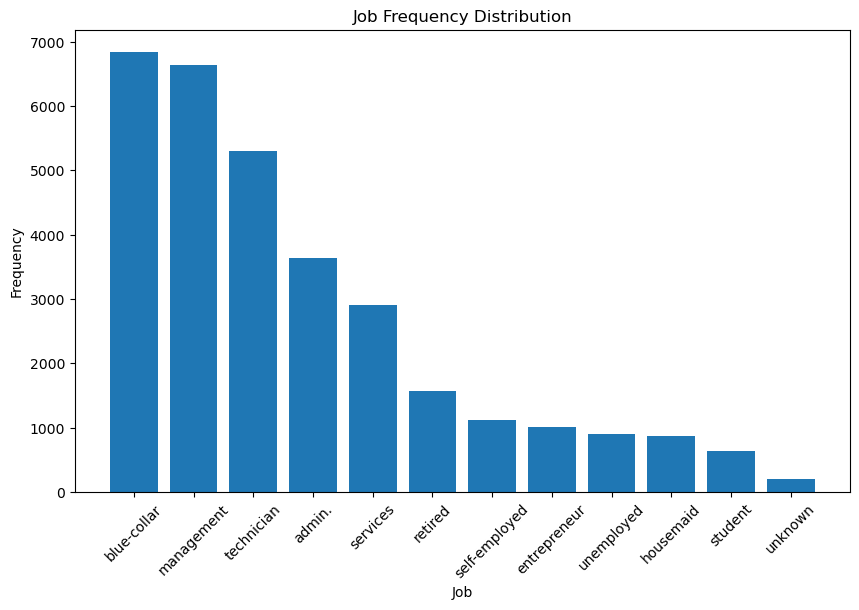

In [16]:
# Count the job frequencies
job_counts = train['job'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(job_counts.index, job_counts)
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.title('Job Frequency Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


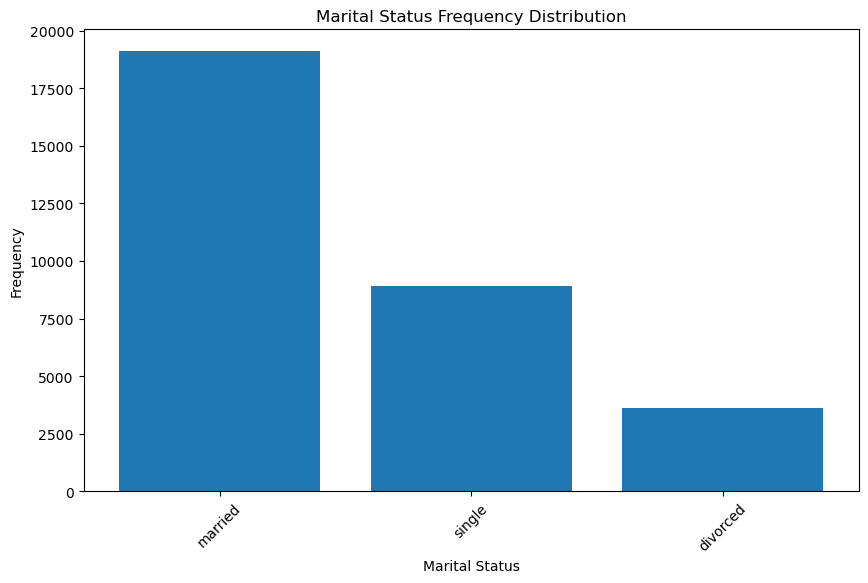

In [17]:
# Count the marital status frequencies
marital_counts = train['marital'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(marital_counts.index, marital_counts)
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Marital Status Frequency Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


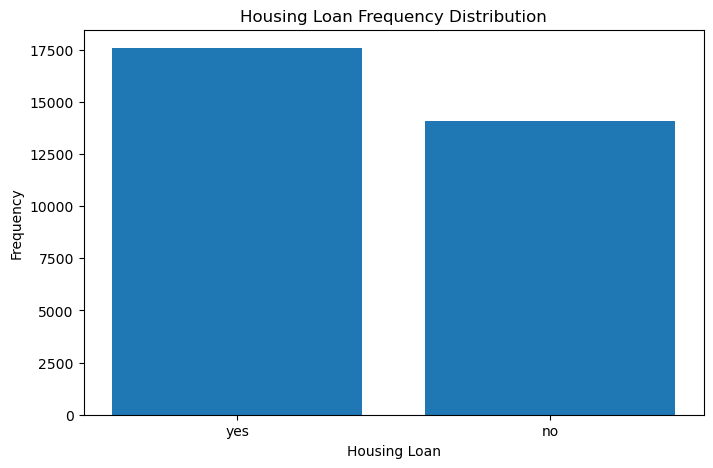

In [18]:
# Count the housing frequencies
housing_counts = train['housing'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(housing_counts.index, housing_counts)
plt.xlabel('Housing Loan')
plt.ylabel('Frequency')
plt.title('Housing Loan Frequency Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels as needed for better readability
plt.show()


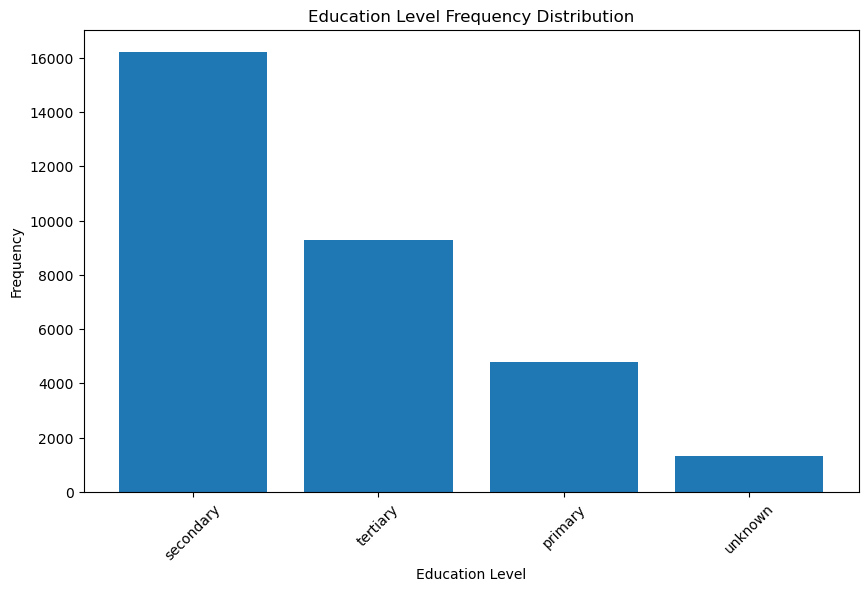

In [19]:
# Count the education frequencies
education_counts = train['education'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(education_counts.index, education_counts)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Education Level Frequency Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


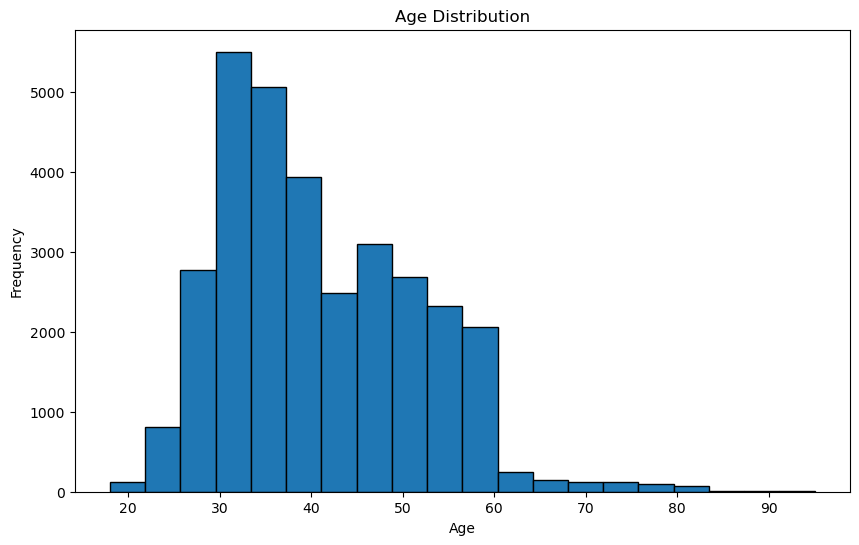

In [20]:
# Create a histogram for age
plt.figure(figsize=(10, 6))
plt.hist(train['age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


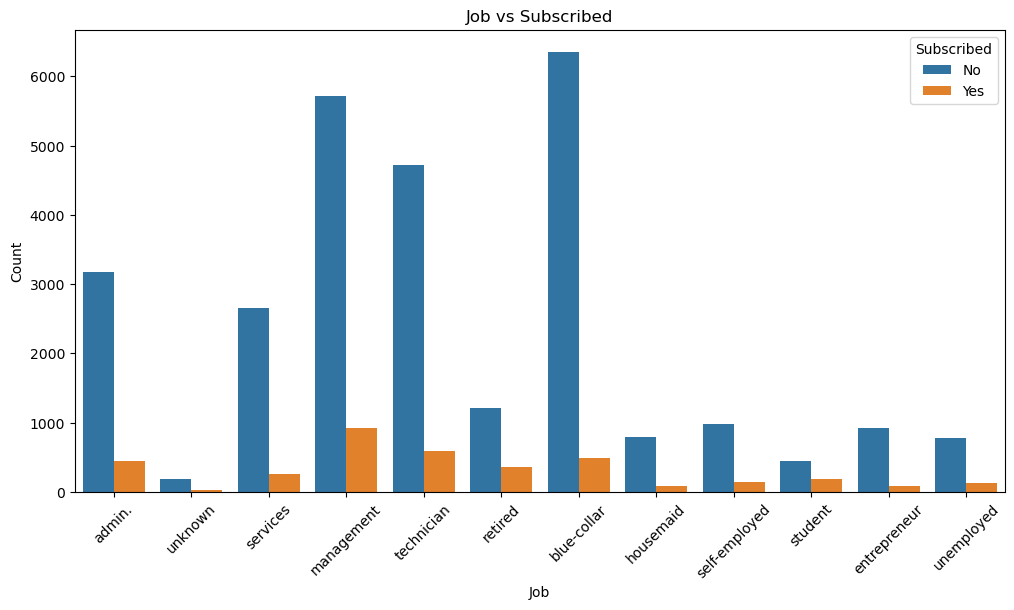

In [21]:
# Create a count plot to compare 'job' with 'subscribed'
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='subscribed', data=train)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job vs Subscribed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

In [22]:
job_subscribed_counts = train.groupby(['job', 'subscribed']).size().unstack()
print(job_subscribed_counts)


subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


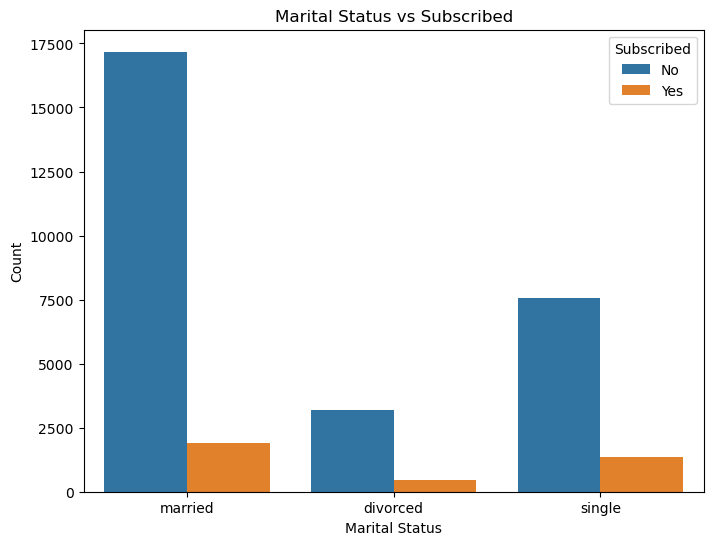

In [23]:
# Create a count plot to compare 'marital' with 'subscribed'
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='subscribed', data=train)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status vs Subscribed')
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Rotate x-axis labels as needed for better readability
plt.show()

In [24]:
marital_subscribed_counts = train.groupby(['marital', 'subscribed']).size().unstack()
print(marital_subscribed_counts)


subscribed     no   yes
marital                
divorced     3185   445
married     17176  1919
single       7571  1351


# Converting the target variables into 0 and 1 by map

In [25]:
train['subscribed'] = train['subscribed'].map({'no': 0, 'yes': 1})


In [26]:
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [27]:
# Calculate the correlation matrix
correlation_matrix = train.corr()

# Print the correlation matrix
print(correlation_matrix)

                  ID       age   balance       day  duration  campaign  \
ID          1.000000  0.013337  0.067897 -0.063399  0.007183 -0.103508   
age         0.013337  1.000000  0.103245 -0.011056 -0.003870  0.005733   
balance     0.067897  0.103245  1.000000  0.003461  0.024274 -0.012032   
day        -0.063399 -0.011056  0.003461  1.000000 -0.032288  0.159168   
duration    0.007183 -0.003870  0.024274 -0.032288  1.000000 -0.080305   
campaign   -0.103508  0.005733 -0.012032  0.159168 -0.080305  1.000000   
pdays       0.436148 -0.021947  0.001789 -0.087626  0.000529 -0.087570   
previous    0.254476  0.005761  0.013843 -0.048752  0.001783 -0.033151   
subscribed  0.296663  0.024538  0.050807 -0.029600  0.389838 -0.070607   

               pdays  previous  subscribed  
ID          0.436148  0.254476    0.296663  
age        -0.021947  0.005761    0.024538  
balance     0.001789  0.013843    0.050807  
day        -0.087626 -0.048752   -0.029600  
duration    0.000529  0.001783    

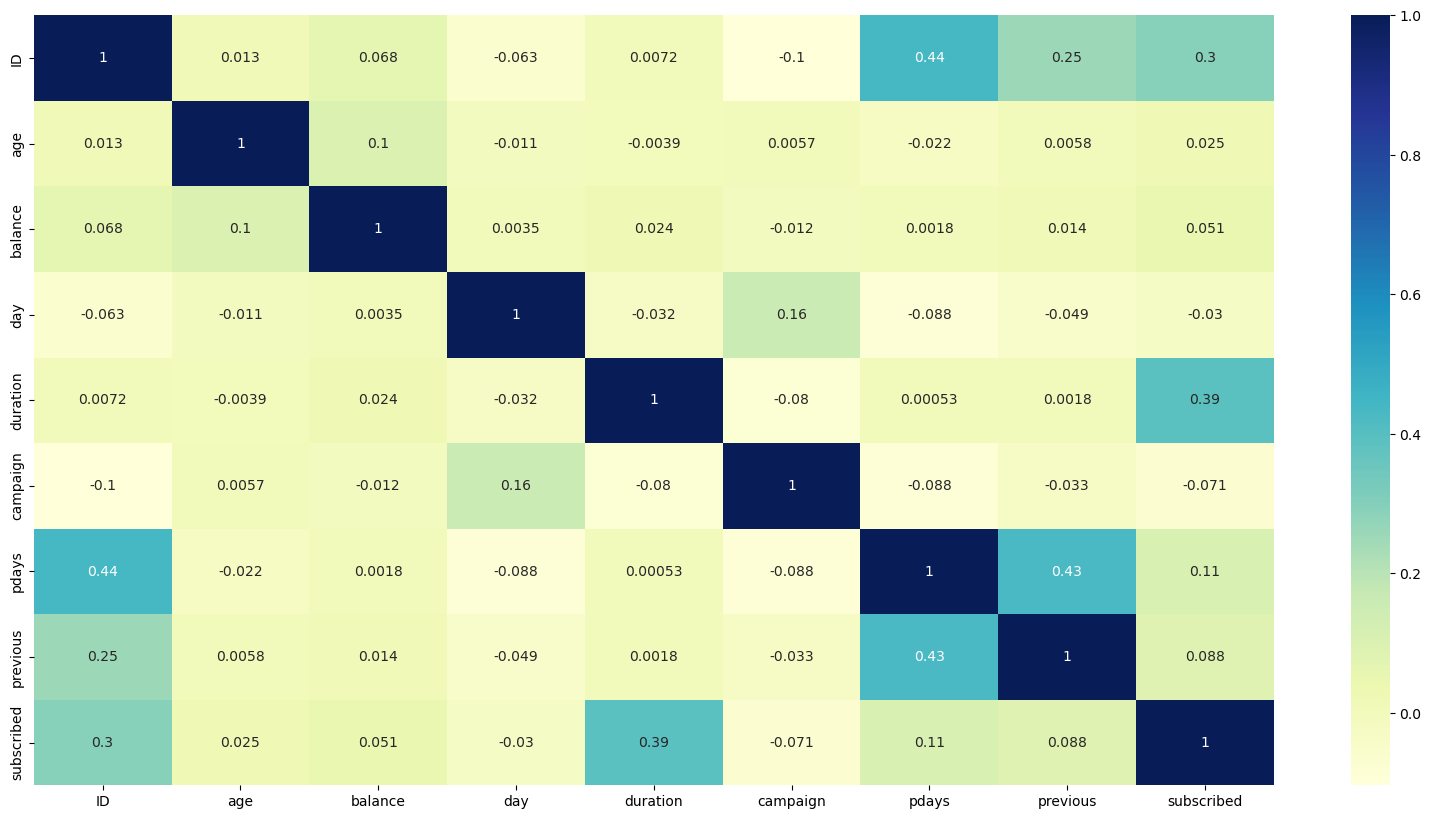

In [28]:
# Assuming you have a correlation matrix named 'tc' from your data
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')

# Show the heatmap
plt.show()

# Prepare Model

# split data

In [29]:
# 'X' contains the features (all columns except 'subscribed')
X = train.drop('subscribed', axis=1)


# 'y' contains the target variable 'subscribed'
Y = train['subscribed']


In [30]:
#generating dummy values on the train dataset
X = pd.get_dummies(X)
X.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Logistic regression

In [32]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5599
           1       0.55      0.27      0.36       731

    accuracy                           0.89      6330
   macro avg       0.73      0.62      0.65      6330
weighted avg       0.87      0.89      0.87      6330



# DecisionTreeClassifier

In [33]:
# Create a Decision Tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5599
           1       0.51      0.55      0.53       731

    accuracy                           0.89      6330
   macro avg       0.72      0.74      0.73      6330
weighted avg       0.89      0.89      0.89      6330



# KNeighborsClassifier

In [34]:
# Create a K-NN classifier with a specified number of neighbors (k)
k = 5  
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'K-NN Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

K-NN Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5599
           1       0.58      0.44      0.50       731

    accuracy                           0.90      6330
   macro avg       0.76      0.70      0.72      6330
weighted avg       0.89      0.90      0.89      6330



# RandomForestClassifier

In [35]:

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5599
           1       0.66      0.45      0.54       731

    accuracy                           0.91      6330
   macro avg       0.80      0.71      0.74      6330
weighted avg       0.90      0.91      0.90      6330



# Support Vector Machines (SVM)

In [37]:
# Create an SVM classifier with an RBF kernel
svm = SVC(kernel='rbf', class_weight='balanced')

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'RBF Kernel SVM Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

RBF Kernel SVM Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5599
           1       0.37      0.80      0.50       731

    accuracy                           0.82      6330
   macro avg       0.67      0.81      0.70      6330
weighted avg       0.90      0.82      0.84      6330



From these metrics, it appears that the Random Forest model has the highest accuracy and F1-score, making it the best-performing model for this problem. K-NN also performs reasonably well. Decision Tree and Logistic Regression have slightly lower performance, while the RBF Kernel SVM shows poor performance

# hyperparameter tuning 

Perform hyperparameter tuning for the Random Forest model using grid  search to optimize its performance.






In [42]:
 #Define the Random Forest Classifier
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model
y_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [43]:
 test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [45]:
test_pred = best_rf.predict(test)

test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [46]:
#save these predictions into a csv file.

In [49]:
 #Assuming 'test_pred' is a list or NumPy array of predictions
predictions = pd.Series(test_pred, name='subscribed')

# Create a DataFrame with 'ID' and 'subscribed' columns
new_sub = pd.DataFrame({'ID': test['ID'], 'subscribed': predictions})

# Save the DataFrame to a CSV file
new_sub.to_csv('submission.csv', index=False)

In [50]:
new_sub['subscribed'].replace(0,'no',inplace=True)
new_sub['subscribed'].replace(1,'yes',inplace=True)
new_sub['subscribed']


0         no
1         no
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [53]:
new_sub.to_csv('new_submission_file.csv',header=True, index=False)